In [20]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 加载数据
file_path_train = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTrain+.txt"
file_path_test = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTest+.txt"
# 定义列名
data_columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]
# 加载数据
train_data = pd.read_csv(file_path_train, header=None, names=data_columns)
test_data= pd.read_csv(file_path_test, header=None, names=data_columns)

In [23]:
print(train_data['label'])

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, Length: 125973, dtype: object


In [24]:
attack_mapping = {}
with open(r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\attack_name', 'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        if len(parts) == 2:
            attack, category = parts
            attack_mapping[attack] = category
# 然后像之前那样使用这个映射字典
train_data['label'] = train_data['label'].map(attack_mapping)
test_data['label'] = test_data['label'].map(attack_mapping)

In [25]:
print(train_data['label'])
train_data.info()

0         normal
1         normal
2            dos
3         normal
4         normal
           ...  
125968       dos
125969    normal
125970    normal
125971       dos
125972    normal
Name: label, Length: 125973, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot  

In [28]:
# 获取训练集和测试集中的 'service' 列
service_train = train_data['service']
service_test = test_data['service']

protocol_type_train = train_data['protocol_type']
protocol_type_test = test_data['protocol_type']

flag_train = train_data['flag']
flag_test = test_data['flag']

label_train = train_data['label']
label_test = test_data['label']

# 找出只在训练集中出现的 service 类型
unique_service = set(service_train) - set(service_test)
unique_protocol_type = set(protocol_type_train) - set(protocol_type_test)
unique_flag = set(flag_train) - set(flag_test)
unique_label = set(label_train) - set(label_test)

test_unique_service = set(service_test) - set(service_train)
test_unique_protocol_type = set(protocol_type_test) - set(protocol_type_train)
test_unique_flag = set(flag_test) - set(flag_train)
test_unique_label = set(label_test) - set(label_train)

# 输出结果
print("service type only exist in train_dataset:", unique_service)
print("protocol type only exist in train_dataset:", unique_protocol_type)
print("flag type only exist in train_dataset:", unique_flag)
print("label type only exist in train_dataset:", unique_label)
print("-------------------------------------------------------")
print("service type only exist in test_dataset:", test_unique_service)
print("protocol type only exist in test_dataset:", test_unique_protocol_type)
print("flag type only exist in test_dataset:", test_unique_flag)
print("label type only exist in test_dataset:", test_unique_label)

service type only exist in train_dataset: {'urh_i', 'http_2784', 'aol', 'http_8001', 'harvest', 'red_i'}
protocol type only exist in train_dataset: set()
flag type only exist in train_dataset: set()
label type only exist in train_dataset: set()
-------------------------------------------------------
service type only exist in test_dataset: set()
protocol type only exist in test_dataset: set()
flag type only exist in test_dataset: set()
label type only exist in test_dataset: set()


In [26]:
# 定义要检查的服务类型列表
services_to_check = ['urh_i', 'http_2784', 'aol', 'http_8001', 'harvest', 'red_i']

# 对每种服务类型进行计数
for service in services_to_check:
    count = (train_data['service'] == service).sum()
    print(f"Number of occurrences for service '{service}': {count}")

Number of occurrences for service 'urh_i': 10
Number of occurrences for service 'http_2784': 1
Number of occurrences for service 'aol': 2
Number of occurrences for service 'http_8001': 2
Number of occurrences for service 'harvest': 2
Number of occurrences for service 'red_i': 8


In [27]:
# 显示一部分数据
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,probe,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,probe,11


In [30]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,probe,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,probe,11


In [31]:
# 删除train_data中的difficulty, label列
X_train = train_data.drop('label', axis=1)
X_train = X_train.drop('difficulty', axis=1)
# 提取出训练集中的label标签
labels_train = train_data['label']
labels = labels_train

In [32]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
# 由于使用的是独热编码
# 但是测试集中的 service 字段与训练集中的 service 缺失了6种数据因此将缺失的这七种数据加入测试集
# 保证测试集 service 字段能够能够进行标签编码
service = X_train['service']
test_service = test_data['service']
different_service_type = np.array(list(set(service) - set(test_service)))
np_service = np.array(list(service))
miss_service_data_index = np.array(
    [True if type_service in different_service_type else False for type_service in np_service])
add_to_test_data = train_data.values[miss_service_data_index.nonzero()]
# 将缺失的数据加入测试集
test_data = np.concatenate((test_data.values, add_to_test_data))

In [23]:
# 删掉测试集的标签项
test_data = pd.DataFrame(test_data)
test_data.columns = data_columns

X_test = test_data.drop('label', axis=1)
X_test = X_test.drop('difficulty', axis=1)
labels_test = test_data['label']

In [24]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.0,0.06,0.0,0.0,0.0,0.0,1.0,1.0
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.0,0.0,1.0,0.28,0.0,0.0,0.0,0.0
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71
4,0,tcp,http,SF,267,14515,0,0,0,0,...,155,255,1.0,0.0,0.01,0.03,0.01,0.0,0.0,0.0


In [25]:
# 找出只在训练集中出现的 service 类型
unique_service = set(service_train) - set(service_test)
unique_protocol_type = set(protocol_type_train) - set(protocol_type_test)
unique_flag = set(flag_train) - set(flag_test)
unique_label = set(label_train) - set(label_test)

test_unique_service = set(service_test) - set(service_train)
test_unique_protocol_type = set(protocol_type_test) - set(protocol_type_train)
test_unique_flag = set(flag_test) - set(flag_train)
test_unique_label = set(label_test) - set(label_train)

# 输出结果
print("service type only exist in train_dataset:", unique_service)
print("protocol type only exist in train_dataset:", unique_protocol_type)
print("flag type only exist in train_dataset:", unique_flag)
print("label type only exist in train_dataset:", unique_label)
print("-------------------------------------------------------")
print("service type only exist in test_dataset:", test_unique_service)
print("protocol type only exist in test_dataset:", test_unique_protocol_type)
print("flag type only exist in test_dataset:", test_unique_flag)
print("label type only exist in test_dataset:", test_unique_label)

service type only exist in train_dataset: {'urh_i', 'aol', 'http_2784', 'harvest', 'red_i', 'http_8001'}
protocol type only exist in train_dataset: set()
flag type only exist in train_dataset: set()
label type only exist in train_dataset: set()
-------------------------------------------------------
service type only exist in test_dataset: set()
protocol type only exist in test_dataset: set()
flag type only exist in test_dataset: set()
label type only exist in test_dataset: set()


In [29]:
# 提取特征方便进行标签编码
test_protocol_type = X_test['protocol_type']
test_service = X_test['service']
test_flag = X_test['flag']

protocol_type = X_train['protocol_type']
service = X_train['service']
flag = X_train['flag']

In [30]:
print(X_test['protocol_type'])
print(X_test['service'])
print(X_test['flag'])

0         tcp
1         tcp
2        icmp
3         tcp
4         tcp
         ... 
22563     tcp
22564    icmp
22565    icmp
22566    icmp
22567     tcp
Name: protocol_type, Length: 22568, dtype: object
0         private
1        ftp_data
2           eco_i
3          telnet
4            http
           ...   
22563         aol
22564       urh_i
22565       red_i
22566       urh_i
22567     harvest
Name: service, Length: 22568, dtype: object
0         REJ
1          SF
2          SF
3        RSTO
4          SF
         ... 
22563     REJ
22564      SF
22565      SF
22566      SF
22567     REJ
Name: flag, Length: 22568, dtype: object


In [14]:
# # 使用标签编码对字符型离散变量进行处理
# le = preprocessing.LabelEncoder()
# enc = preprocessing.OneHotEncoder()
# lb = preprocessing.LabelBinarizer()
# 
# # 对训练集进行 one-hot 编码
# X_train['protocol_type'] = le.fit_transform(protocol_type)
# X_train['service'] = le.fit_transform(service)
# X_train['flag'] = le.fit_transform(flag)
# labels_train = le.fit_transform(labels_train) + 1
# 
# # 对测试集进行 one-hot 编码
# X_test['protocol_type'] = le.fit_transform(test_protocol_type)
# X_test['service'] = le.fit_transform(test_service)
# X_test['flag'] = le.fit_transform(test_flag)
# 
# 
# X = X_train
# standard_train_X = StandardScaler().fit_transform(X)
# 
# # test_X = X_test.to_numpy()
# test_X = X_test
# standard_test_X = StandardScaler().fit_transform(test_X)

In [31]:
from sklearn import preprocessing

# 初始化LabelEncoder
le_protocol_type = preprocessing.LabelEncoder()
le_service = preprocessing.LabelEncoder()
le_flag = preprocessing.LabelEncoder()
le_labels = preprocessing.LabelEncoder()

# 对训练集进行标签编码
X_train['protocol_type'] = le_protocol_type.fit_transform(X_train['protocol_type'])
X_train['service'] = le_service.fit_transform(X_train['service'])
X_train['flag'] = le_flag.fit_transform(X_train['flag'])
labels_train = le_labels.fit_transform(labels_train) + 1

# 使用相同的编码器对测试集进行标签编码
X_test['protocol_type'] = le_protocol_type.transform(X_test['protocol_type'])
X_test['service'] = le_service.transform(X_test['service'])
X_test['flag'] = le_flag.transform(X_test['flag'])

# 特征标准化
scaler = preprocessing.StandardScaler()
standard_train_X = scaler.fit_transform(X_train)
standard_test_X = scaler.transform(X_test)


In [32]:
print(X_test['protocol_type'])
print(X_test['service'])
print(X_test['flag'])

0        1
1        1
2        0
3        1
4        1
        ..
22563    1
22564    0
22565    0
22566    0
22567    1
Name: protocol_type, Length: 22568, dtype: int32
0        49
1        20
2        14
3        60
4        24
         ..
22563     3
22564    64
22565    50
22566    64
22567    22
Name: service, Length: 22568, dtype: int32
0        1
1        9
2        9
3        2
4        9
        ..
22563    1
22564    9
22565    9
22566    9
22567    1
Name: flag, Length: 22568, dtype: int32


In [33]:
print(f'The dimension after Z-score StandardScaler: {standard_train_X.shape}')
print(f'The dimension after Z-score StandardScaler: {standard_test_X.shape}')

The dimension after Z-score StandardScaler: (125972, 41)
The dimension after Z-score StandardScaler: (22568, 41)


In [34]:
# 打印经过标准化的训练数据的前几行
print(standard_train_X[:1 :])
# 计算并打印训练数据的均值和标准差
print("Train Data Mean:", np.mean(standard_train_X, axis=0))
print("Train Data Standard Deviation:", np.std(standard_train_X, axis=0))

[[-0.11024967  2.21930219  0.78142044  0.75111595 -0.0077374  -0.00491866
  -0.01408887 -0.08948678 -0.00773602 -0.09507605 -0.02702293 -0.80926713
  -0.01166369 -0.03665201 -0.0244366  -0.0123852  -0.02618013 -0.01860997
  -0.04122136  0.         -0.00281751 -0.09753133 -0.62098696 -0.36811175
  -0.63721282 -0.63193254 -0.37436393 -0.3744333  -1.32141976  0.4821961
  -0.3745614   0.73433738 -1.03569278 -1.16103461  2.73683944  2.36772855
  -0.28910464 -0.63953548 -0.62487425 -0.38763494 -0.37638873]]
Train Data Mean: [ 4.08370861e-17  4.80851048e-17  9.30115400e-17 -1.23864974e-16
 -9.02477040e-19 -1.69214445e-18  3.38428890e-18  2.17158538e-18
  6.23273206e-18 -7.78386447e-18  9.87084263e-19 -5.06233215e-17
 -3.44069372e-18 -2.67922871e-18 -6.48655373e-19  1.53703121e-18
  8.31971022e-18 -1.12809630e-18  5.21744539e-19  0.00000000e+00
 -1.31141195e-18  1.70906590e-17 -1.21270352e-17 -1.43550254e-17
 -1.70370744e-16 -9.89622480e-17 -1.94173576e-17 -4.99464637e-17
  2.90202773e-16  1.8

In [35]:
# 打印经过标准化的测试数据的前几行
print(standard_test_X[:1, :])
# 计算并打印测试数据的均值和标准差
print("Test Data Mean:", np.mean(standard_test_X, axis=0))
print("Test Data Standard Deviation:", np.std(standard_test_X, axis=0))

[[-1.10249666e-01 -1.24706659e-01  1.08729745e+00 -2.22357076e+00
  -7.76227089e-03 -4.91866391e-03 -1.40888677e-02 -8.94867800e-02
  -7.73601574e-03 -9.50760523e-02 -2.70229257e-02 -8.09267134e-01
  -1.16636889e-02 -3.66520148e-02 -2.44366043e-02 -1.23851995e-02
  -2.61801282e-02 -1.86099702e-02 -4.12213615e-02  0.00000000e+00
  -2.81750510e-03 -9.75313348e-02  4.53170294e-01 -3.68111748e-01
  -6.37212824e-01 -6.31932543e-01  2.74639045e+00  2.71535234e+00
  -1.48064753e+00 -1.69323146e-02 -3.74561400e-01  7.34337380e-01
  -1.03569278e+00 -1.16103461e+00 -1.21486965e-01 -4.80194395e-01
  -2.89104644e-01 -6.39535482e-01 -6.24874248e-01  2.87439693e+00
   2.75390135e+00]]
Test Data Mean: [-0.02630839  0.0373216   0.20252569 -0.03916702 -0.0059933  -0.00440792
  0.00793102 -0.05627966  0.04161433 -0.04610705  0.45096004  0.09405336
 -0.00666113  0.02992967 -0.01854873 -0.00769075 -0.00814222  0.03332939
 -0.00554804  0.          0.17017941  0.19645858 -0.04378141  0.04619489
 -0.40685321

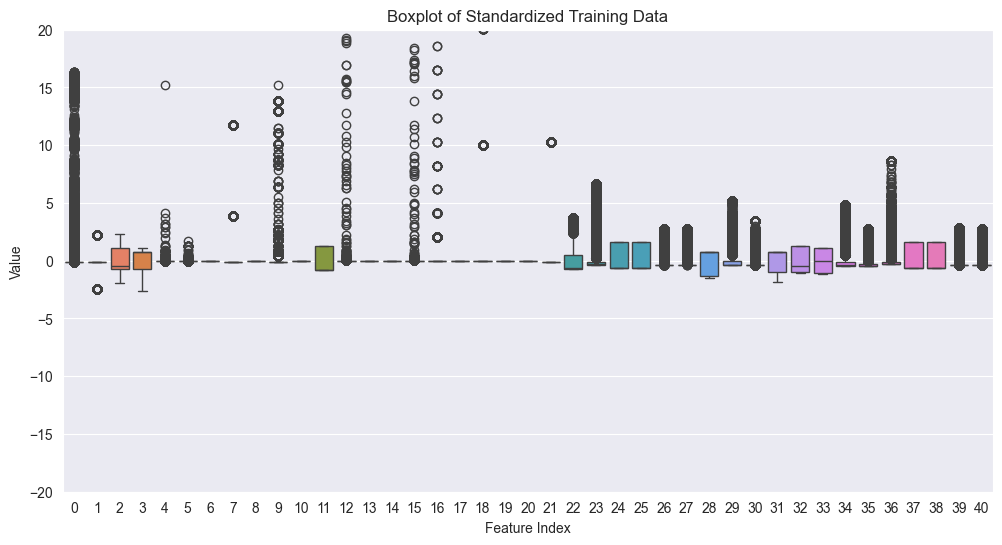

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=standard_train_X)
plt.title('Boxplot of Standardized Training Data')
plt.ylim([-20, 20])
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.show()

In [37]:
# check if there are extreme values
extreme_values = standard_train_X[np.abs(standard_train_X) > 3]
print(extreme_values)
extreme_count = len(extreme_values)  # extreme_values count
extreme_max = np.max(extreme_values)  # extreme_values max
extreme_min = np.min(extreme_values)  # extreme_values min

print("Number of extreme values:", extreme_count)
print("Maximum extreme value:", extreme_max)
print("Minimum extreme value:", extreme_min)

[ 8.59474868  4.0601387  10.02222311 ... 10.02222311  3.47410365
  8.59474868]
Number of extreme values: 32931
Maximum extreme value: 354.9239355129491
Minimum extreme value: 3.0014992879841653


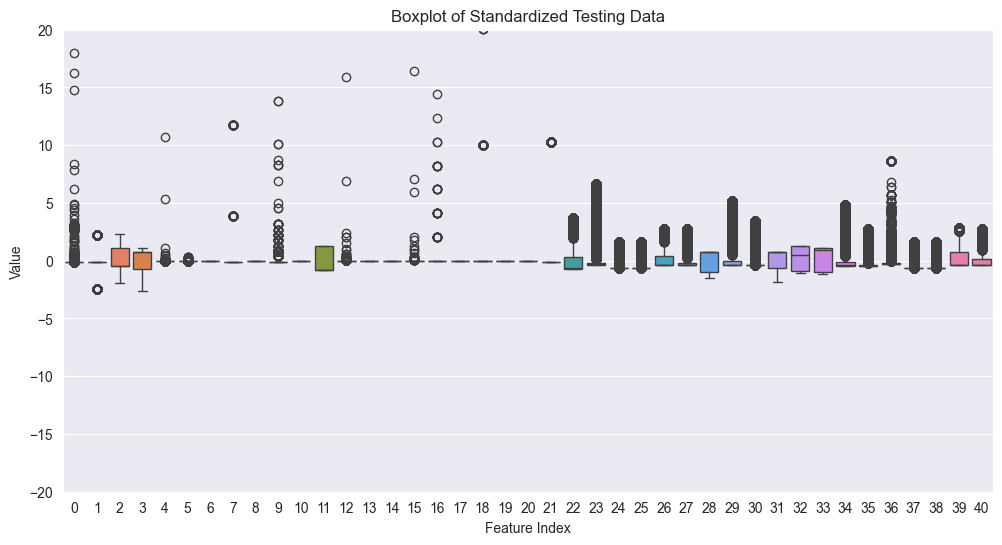

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=standard_test_X)
plt.title('Boxplot of Standardized Testing Data')
plt.ylim([-20, 20])
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.show()

In [39]:
# check if there are extreme values
extreme_values = standard_test_X[np.abs(standard_test_X) > 3]
print(extreme_values)
extreme_count = len(extreme_values)  # extreme_values count
extreme_max = np.max(extreme_values)  # extreme_values max
extreme_min = np.min(extreme_values)  # extreme_values min

print("Number of extreme values:", extreme_count)
print("Maximum extreme value:", extreme_max)
print("Minimum extreme value:", extreme_min)

[3.47410365 3.47410365 3.37202308 ... 3.72803997 5.19618664 4.85411825]
Number of extreme values: 8152
Maximum extreme value: 354.9239355129491
Minimum extreme value: 3.000118071064693


In [ ]:
from yellowbrick.features import Rank1D, Rank2D, PCADecomposition
Columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
X = standard_train_X[Columns].values 
y = standard_test_X.label.values
visualizer = Rank1D(features=Columns, algorithm='shapiro')
visualizer.fit(X, y) 
visualizer.transform(X) 
visualizer.show()

In [23]:
print(set(labels))

{'satan', 'back', 'buffer_overflow', 'perl', 'warezclient', 'teardrop', 'nmap', 'multihop', 'imap', 'normal', 'spy', 'ftp_write', 'neptune', 'guess_passwd', 'ipsweep', 'phf', 'smurf', 'pod', 'rootkit', 'land', 'warezmaster', 'portsweep', 'loadmodule'}


In [40]:
# 记录下使用独热编码后编码所对应的攻击类型
index_2_labels = []
for i in range(1, 24):
    labels_ont_hot_index = (labels_train == i).nonzero()
    label = labels[labels_ont_hot_index[0][0]]
    index_2_labels.append(label)
print(index_2_labels)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [41]:
# 进行 PCA 降维
pca = PCA(n_components=41)
pca.fit(standard_train_X)

PCA(n_components=41)

In [26]:
import joblib
joblib.dump(pca, r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\pca_model.m')

['D:\\Download\\zyFile\\Cyberthreat_Cognitive_System\\CTCS_Code\\attack_datasets\\NSL-KDD\\pca_model.m']

In [42]:
print(pca.explained_variance_ratio_)
new_X = pca.fit_transform(standard_train_X)
new_test_X = pca.transform(standard_test_X)
np.shape(new_test_X)

[1.92900974e-01 1.29485682e-01 7.04439291e-02 5.31449808e-02
 4.85815317e-02 4.17691433e-02 3.96529926e-02 3.28079685e-02
 2.80512201e-02 2.73051427e-02 2.64398260e-02 2.51755671e-02
 2.50034191e-02 2.49993420e-02 2.48596994e-02 2.46763455e-02
 2.32500385e-02 2.25602201e-02 1.92203509e-02 1.75161808e-02
 1.55146912e-02 1.50089410e-02 1.22424414e-02 1.11758835e-02
 1.03959990e-02 8.92111257e-03 7.85233782e-03 5.90036869e-03
 3.48647746e-03 3.29727876e-03 2.46079181e-03 1.64211863e-03
 1.22207487e-03 1.08234470e-03 7.21889664e-04 5.30475917e-04
 3.59285624e-04 2.25140197e-04 1.02027978e-04 1.37640849e-05
 1.10702605e-33]


(22568, 41)

In [43]:
length_variance_contribute = np.size(pca.explained_variance_ratio_)
contribute = 0
index = 0
for i in range(length_variance_contribute):
    contribute += pca.explained_variance_ratio_[i]
    if contribute >= 0.85:
        index = i
        break
print(index)

17


In [44]:
# 产生新的特征
new_X = new_X[:, 0:index]
new_test_X = new_test_X[:, 0:index]
np.shape(new_X)

(125972, 17)

In [45]:
new_test_X

array([[ 2.97631445e+00,  5.46864709e+00, -1.15767407e-01, ...,
        -2.44276327e-01, -7.93623338e-03,  2.30596730e-01],
       [-1.63877123e+00, -5.61075507e-02, -7.54518340e-02, ...,
        -1.09384765e-01,  3.60594671e-02, -4.68429776e-01],
       [-3.02345342e+00,  2.37499785e-01, -1.45054134e-01, ...,
        -5.13718717e-01,  4.79412566e-02,  3.93332175e-01],
       ...,
       [-5.21076559e-01,  1.32750752e-02,  8.86813407e-02, ...,
        -3.80723543e-01, -5.38118216e-03,  2.24478539e-01],
       [-6.67341755e-01,  5.47828997e-03,  1.36375066e-01, ...,
        -4.06707143e-01, -2.67036096e-02,  2.12633645e-01],
       [ 4.72302817e+00,  6.61045617e+00, -2.00788861e-01, ...,
         9.90500450e-01,  2.33794535e-01,  1.24190225e+00]])

In [46]:
new_test_X.shape

(22568, 17)

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import time

x_train, x_test, y_train, y_test = train_test_split(new_X, labels_train, test_size=0.3)

# clf = joblib.load('./model/IDS_model_8-0.m')
# if clf == None:
svc = SVC(kernel='rbf', class_weight='balanced', C=0.5)
#     c_range = np.logspace(-5, 15, 11, base=2)
#     gamma_range = np.logspace(-9, 3, 13, base=2)
#     param_grid = [{'kernel': ['rbf'], 'C': c_range, 'gamma': gamma_range}]
#     grid = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1)
start = time.time()
clf = svc.fit(x_train, y_train)
print('对降维后的数据进行训练用时为{0}'.format(time.time() - start))
score = clf.score(x_test, y_test)
print(f'score is {score}')
#保存模型
#     joblib.dump(clf, './model/IDS_model_8-0.m')
#     print('save done')

对降维后的数据进行训练用时为17.420872449874878
score is 0.9658657917019475


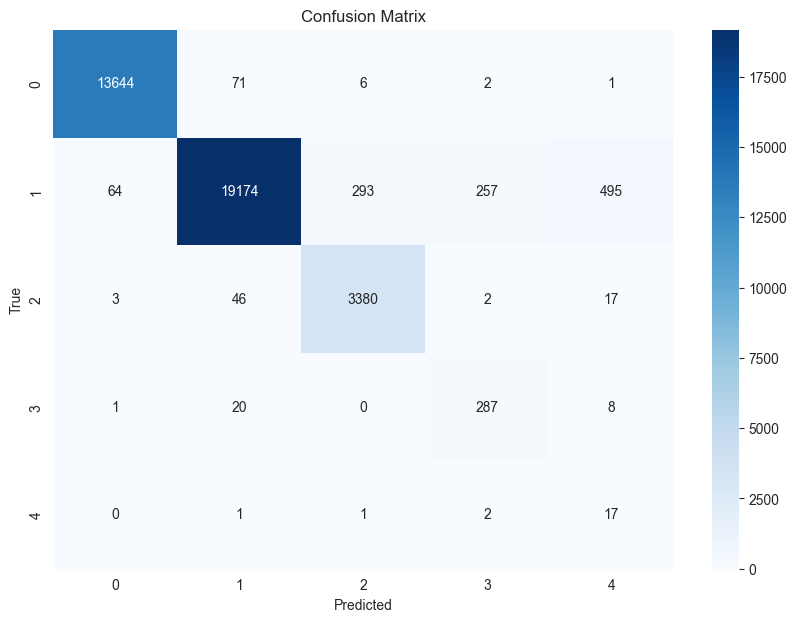

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 使用测试集进行预测
y_pred = clf.predict(x_test)

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


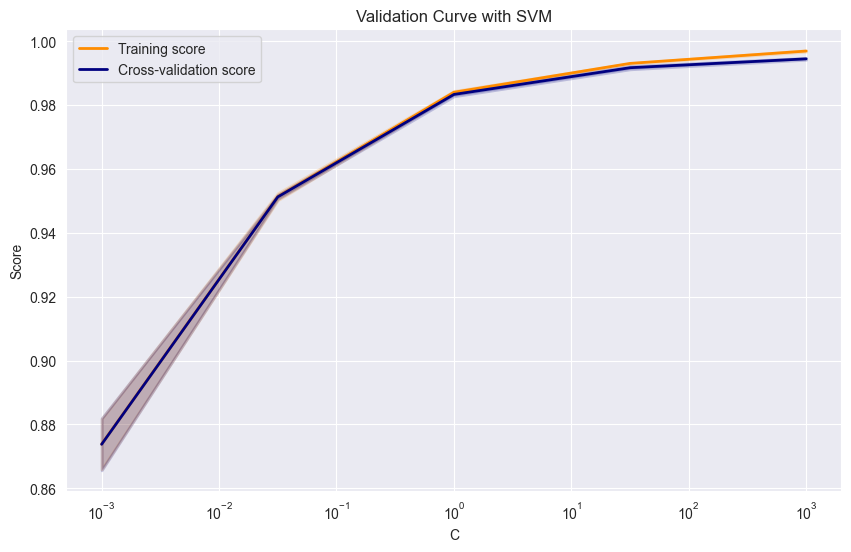

In [63]:
from sklearn.model_selection import validation_curve

# 设置要测试的参数范围
param_range = np.logspace(-3, 3, 5)

# 计算验证曲线
train_scores, test_scores = validation_curve(
    SVC(), x_train, y_train, param_name="C", param_range=param_range,
    cv=3, scoring="accuracy", n_jobs=-1)

# 计算得分的平均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘制验证曲线
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算FPR, TPR, 和阈值
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(x_test))

# 计算曲线下面积（AUC）
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 计算精确度和召回率
precision, recall, _ = precision_recall_curve(y_test, clf.decision_function(x_test))

# 计算平均精确度
average_precision = average_precision_score(y_test, clf.decision_function(x_test))

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [58]:
def evaluate(Y, labels_test, evaluate_method=1):
    acc = 0
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    if evaluate_method == 1:
        for predict_y, real_y in zip(Y, labels_test):
            if predict_y == 12 and real_y == 'normal':
                acc += 1
            if predict_y != 12 and real_y != 'normal':
                acc += 1
            if predict_y == 12 and real_y != 'normal':
                FN += 1
            if real_y == 'normal' and predict_y != 12:
                FP += 1
            if predict_y != 12 and real_y != 'normal':
                TP += 1
            if predict_y == 12 and real_y == 'normal':
                TN += 1
    elif evaluate_method == 2:
        for predict_y, real_y in zip(Y, labels_test):
            if predict_y == 12 and real_y == 12:
                acc += 1
            if predict_y != 12 and real_y != 12:
                acc += 1
            if predict_y == 12 and real_y != 12:
                FN += 1
            if real_y == 12 and predict_y != 12:
                FP += 1
            if predict_y != 12 and real_y != 12:
                TP += 1
            if predict_y == 12 and real_y == 12:
                TN += 1

    precent_acc = acc / len(labels_test)
    print(TP, FN)
    print(FP, TN)
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print('acc radio %s ' % precent_acc)
    print('TPR is %s' % TPR)
    print('FPR is %s' % FPR)

In [59]:
# 对 NSL-KDD-test_set 进行模型评估
Y = clf.predict(new_test_X)
evaluate(Y, labels_test)

10321 2518
906 8823
acc radio 0.8482807515065579 
TPR is 0.8038788067606512
FPR is 0.0931236509404872


In [60]:
# 对 NSL-KDD-30%-train_set 进行模型评估
Y = clf.predict(x_test)
evaluate(Y, y_test, evaluate_method=2)

17448 56
1988 18300
acc radio 0.9459144792548687 
TPR is 0.996800731261426
FPR is 0.09798895899053628


In [61]:
all_labels = {'DOS': ['back', 'neptune', 'smurf', 'teardrop', 'land', 'pod', 'apache2', 'mailbomd', 'processtable'],
              'Probe': ['satan', 'portsweep', 'ipsweep', 'nmap', 'mscan', 'saint'],
              'R2L': ['warezmaster', 'ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient',
                      'sendmail', 'named', 'snmpgetattack', 'snmpguess', 'xlock', 'xsnoop', 'worm'],
              'U2R': ['rootkit', 'buffer_overflow', 'loadmodule', 'perl', 'httptunnel', 'ps', 'sqlattack', 'xterm'],
              'NORMAL': ['normal']}

In [62]:
types_attack = all_labels.keys()
types_attack

dict_keys(['DOS', 'Probe', 'R2L', 'U2R', 'NORMAL'])